# Walmart Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from scipy.stats import binom
from scipy.stats import norm

In [3]:
Data = pd.read_csv("D:\Python programmes\Data Collection\walmart_data.csv")

In [4]:
df = Data.copy(deep=True)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [6]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [7]:
df.groupby("User_ID")

# Problem statements
 - <strong>1. Are women spending more money per transaction than men? Why or Why not?</strong>
 - <strong>2. Confidence intervals and distribution of the mean of the expenses by female and male customers</strong>
 - <strong>3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?</strong>
 - <strong>4. Analysis on Married vs Unmarried</strong>

# 1. Analyzing basic metrics

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary<bbr>
Non-Graphical Analysis: Value counts and unique attributes<br>
Visual Analysis - Univariate & Bivariate<br>
For continuous variable(s): Distplot, countplot, histogram for univariate analysis<br>
For categorical variable(s): Boxplot<br>
For correlation: Heatmaps, Pairplots<br>

### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

#### shape of data

In [8]:
df.shape

(550068, 10)

#### data type of all attributes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### changing data type

In [10]:
df["Occupation"]=df["Occupation"].apply(lambda x: str(x))

In [11]:
df["Marital_Status"]=df["Marital_Status"].astype("str")

In [12]:
df["Product_Category"]=df["Product_Category"].astype("str")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


#### checking any missing/null values

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### checking any duplicate rows

In [15]:
df.duplicated().sum()

0

In [16]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


### Non-Graphical Analysis: Value counts and unique attributes

#### objects count and checking unique items

In [17]:
df.describe(include="object")

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


#### value counts

In [18]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [19]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [20]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [21]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [22]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [23]:
df["Occupation"].value_counts()[:10]  #Top 10

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: Occupation, dtype: int64

### Checking outliers

In [24]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


<AxesSubplot:xlabel='Purchase'>

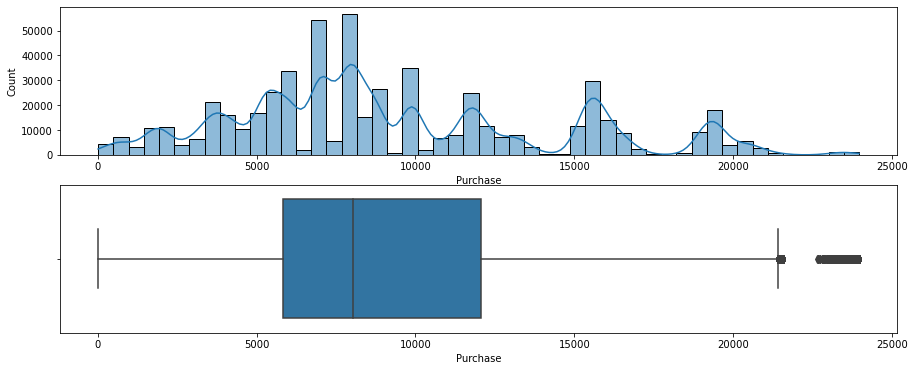

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(data=df, x="Purchase", bins=50, kde=True)
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Purchase")

In [26]:
IQR=df["Purchase"].quantile(0.75)-df["Purchase"].quantile(0.25)
IQR

6231.0

In [27]:
LCV = df["Purchase"].quantile(0.25)-1.5*IQR; Q1 = df["Purchase"].quantile(0.25)
Q2 = df["Purchase"].quantile(0.50); Q3 = df["Purchase"].quantile(0.75)
UCV = df["Purchase"].quantile(0.75)+1.5*IQR
print("LCV=",LCV);print("Q1=",Q1);print("Q2=",Q2);print("Q3=",Q3);print("UCV=",UCV)

LCV= -3523.5
Q1= 5823.0
Q2= 8047.0
Q3= 12054.0
UCV= 21400.5


In [28]:
len(df[(df["Purchase"]>UCV)|(df["Purchase"]<LCV)]["Purchase"])

2677

In [29]:
len(df["Purchase"])

550068

In [30]:
# % of outlier
X = (len(df[(df["Purchase"]>UCV)|(df["Purchase"]<LCV)]["Purchase"]))/len(df["Purchase"])*100
print(X,"% outliers in purchase")

0.4866671029763593 % outliers in purchase


# Male vs Female

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

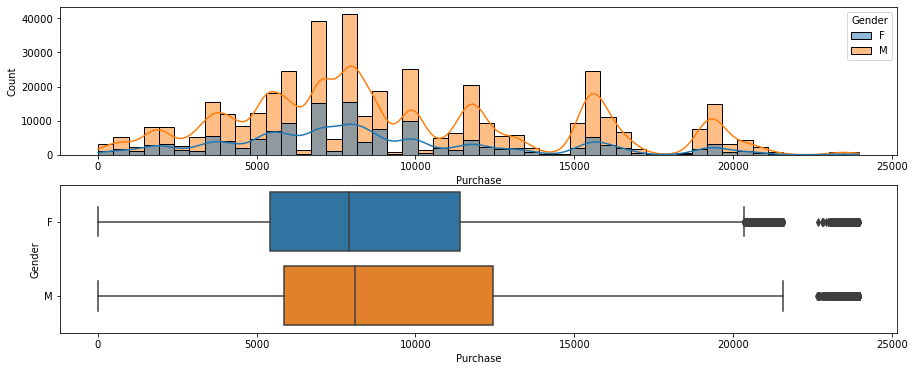

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(data=df, x="Purchase", hue="Gender", bins=50, kde=True)
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Purchase", y="Gender")

## purchase data analysis

### purchase data analysis [ groupby user id and mean(purchase) ]

In [34]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [35]:
DF = df.groupby(["User_ID"])[["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Purchase"]].aggregate({"Gender":"first","Age":"first","Occupation":"first","City_Category":"first","Stay_In_Current_City_Years":"first","Marital_Status":"first","Purchase":"mean"})

In [36]:
DF

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,9545.514286
1000002,M,55+,16,C,4+,0,10525.610390
1000003,M,26-35,15,A,3,0,11780.517241
1000004,M,46-50,7,B,2,1,14747.714286
1000005,M,26-35,20,A,1,1,7745.292453
...,...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1,8007.894942
1006037,F,46-50,1,C,4+,0,9176.540984
1006038,F,55+,1,C,2,0,7502.833333


<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

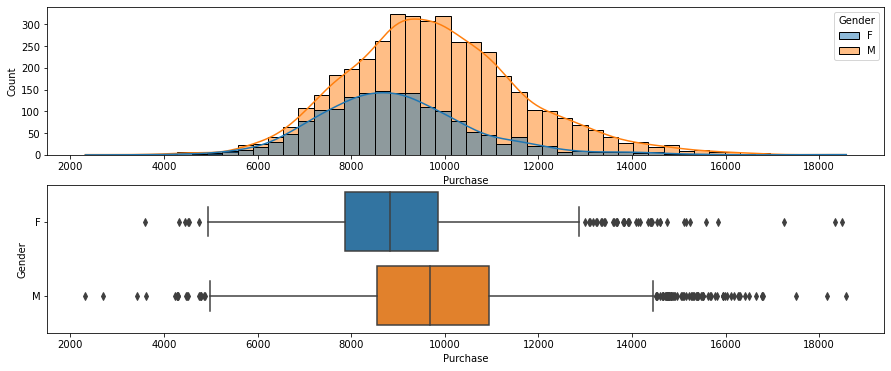

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(data=DF, x="Purchase", hue="Gender", bins=50, kde=True)
plt.subplot(2,1,2)
sns.boxplot(data=DF, x="Purchase", y="Gender")

<mark><strong>Method 1 - CLT formula : 95% confidence interval for mean purchase</strong></mark>

In [38]:
X = DF.groupby(['Gender'])['Purchase'].describe(); X

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1666.0,8965.198464,1705.615508,3599.733333,7857.252965,8818.059311,9859.887613,18490.166667
M,4225.0,9806.867524,1906.396106,2318.733333,8552.733333,9681.895604,10933.852459,18577.893617


In [39]:
X.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [40]:
#zscore for 95% confidence interval
norm.ppf(0.975)

1.959963984540054

In [41]:
se_male = X.loc["M","std"]/np.sqrt(X.loc["M","count"]); se_male

29.3291708572095

In [42]:
se_female = X.loc["F","std"]/np.sqrt(X.loc["F","count"]); se_female

41.78723519231178

In [43]:
male_lower_limit = X.loc["M","mean"]-norm.ppf(0.975)*se_male
male_upper_limit = X.loc["M","mean"]+norm.ppf(0.975)*se_male
interval_male = (male_lower_limit,male_upper_limit)
print("95% confidence interval for male mean purchase: ", interval_male)

95% confidence interval for male mean purchase:  (9749.38340565008, 9864.351642803185)


In [44]:
female_lower_limit = X.loc["F","mean"]-norm.ppf(0.975)*se_female
female_upper_limit = X.loc["F","mean"]+norm.ppf(0.975)*se_female
interval_female = (female_lower_limit,female_upper_limit)
print("95% confidence interval for female mean purchase: ", interval_female)

95% confidence interval for female mean purchase:  (8883.29698794602, 9047.099939926893)


<mark><strong>Method 2 - Bootstrapping : 95% confidence interval for mean purchase</strong></mark>

In [45]:
male = DF[DF["Gender"]=="M"]["Purchase"].values; male

array([10525.61038961, 11780.51724138, 14747.71428571, ...,
       13940.08333333, 16423.83333333,  9184.99444444])

In [46]:
female = DF[DF["Gender"]=="F"]["Purchase"].values; female

array([9545.51428571, 8083.61702128, 9728.74439462, ..., 9176.54098361,
       7502.83333333, 7977.28378378])

In [47]:
[male.shape,female.shape]

[(4225,), (1666,)]

<mark>resample_size_male:resample_size_female = 4225:1666</mark><br>
<mark>resample_size $\approx$ 100% of observed_sample_size</mark>

In [48]:
male_spends = [np.mean(random.choices(male, k=4225)) for i in range(1000)]

In [49]:
female_spends = [np.mean(random.choices(female, k=1666)) for i in range(1000)]

<AxesSubplot:title={'center':'FEMALE'}, ylabel='Count'>

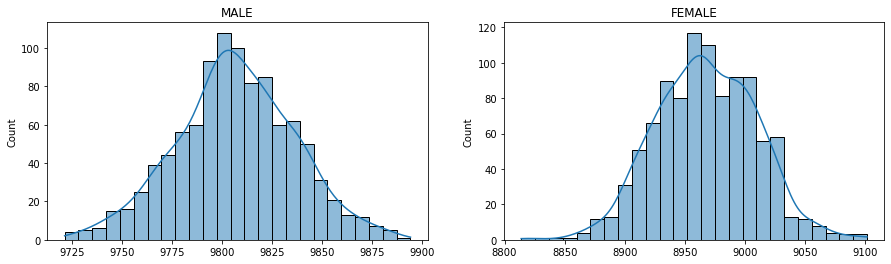

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("MALE")
sns.histplot(male_spends, bins=25, kde=True)
plt.subplot(1,2,2)
plt.title("FEMALE")
sns.histplot(female_spends, bins=25, kde=True)

In [51]:
se_male = np.std(male_spends); se_male

29.52753535491279

In [52]:
se_female = np.std(female_spends); se_female

41.66356518062466

In [53]:
male_L_limit = np.mean(male_spends)-norm.ppf(0.975)*se_male
male_U_limit = np.mean(male_spends)+norm.ppf(0.975)*se_male
((male_L_limit, male_U_limit),np.mean(male_spends))
print("95% confidence interval for male: ",((male_L_limit, male_U_limit),np.mean(male_spends)))

95% confidence interval for male:  ((9749.0971583368, 9864.842970032523), 9806.970064184661)


In [54]:
female_L_limit = np.mean(female_spends)-norm.ppf(0.975)*se_female
female_U_limit = np.mean(female_spends)+norm.ppf(0.975)*se_female
((female_L_limit, female_U_limit),np.mean(female_spends))
print("95% confidence interval for female: ",((female_L_limit, female_U_limit),np.mean(female_spends)))

95% confidence interval for female:  ((8885.884799650306, 9049.20297409343), 8967.543886871868)


- <mark>Male and female mean purchase confidence interval is not overlapping</mark>
- <mark>Male are spending more money per transaction than female</mark>

# Unmarried vs Married

<AxesSubplot:xlabel='Purchase', ylabel='Marital_Status'>

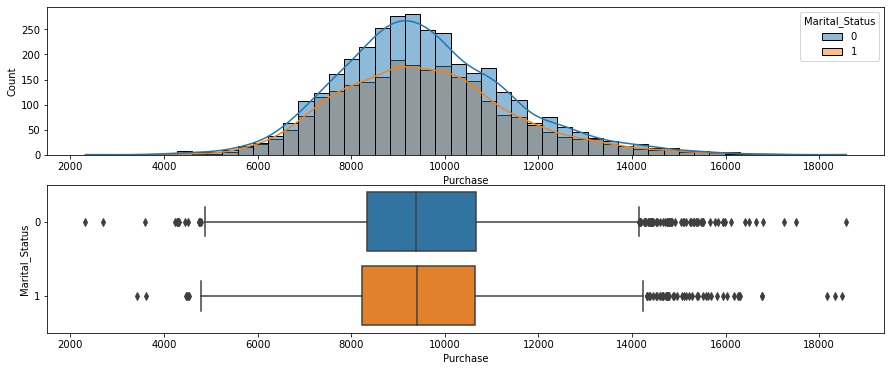

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(data=DF, x="Purchase", hue="Marital_Status", bins=50, kde=True)
plt.subplot(2,1,2)
sns.boxplot(data=DF, x="Purchase", y="Marital_Status")

<mark><strong>Method 1 - CLT formula : 95% confidence interval for mean purchase</strong></mark>

In [56]:
X = DF.groupby(['Marital_Status'])['Purchase'].describe(); X

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,3417.0,9564.407142,1877.332265,2318.733333,8331.857143,9376.844828,10657.730909,18577.893617
1,2474.0,9574.962299,1907.927002,3421.521739,8230.633143,9408.700535,10642.843137,18490.166667


In [57]:
X.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [58]:
#zscore for 95% confidence interval
norm.ppf(0.975)

1.959963984540054

In [63]:
se_unmarried = X.loc["0","std"]/np.sqrt(X.loc["0","count"]); se_unmarried

32.11579335486183

In [64]:
se_married = X.loc["1","std"]/np.sqrt(X.loc["1","count"]); se_married

38.35852569852861

In [66]:
unmarried_lower_limit = X.loc["0","mean"]-norm.ppf(0.975)*se_unmarried
unmarried_upper_limit = X.loc["0","mean"]+norm.ppf(0.975)*se_unmarried
interval_unmarried = (unmarried_lower_limit,unmarried_upper_limit)
print("95% confidence interval for unmarried mean purchase: ", interval_unmarried)

95% confidence interval for unmarried mean purchase:  (9501.461343325827, 9627.352939946748)


In [67]:
married_lower_limit = X.loc["1","mean"]-norm.ppf(0.975)*se_married
married_upper_limit = X.loc["1","mean"]+norm.ppf(0.975)*se_married
interval_married = (married_lower_limit,married_upper_limit)
print("95% confidence interval for married mean purchase: ", interval_married)

95% confidence interval for married mean purchase:  (9499.78097016258, 9650.14362790092)


<mark><strong>Method 2 - Bootstrapping : 95% confidence interval for mean purchase</strong></mark>

In [68]:
unmarried = DF[DF["Marital_Status"]=="0"]["Purchase"].values; unmarried

array([ 9545.51428571, 10525.61038961, 11780.51724138, ...,
        9176.54098361,  7502.83333333,  9184.99444444])

In [69]:
married = DF[DF["Marital_Status"]=="1"]["Purchase"].values; married

array([14747.71428571,  7745.29245283, 13804.        , ...,
       13940.08333333,  8007.89494163,  7977.28378378])

In [70]:
[unmarried.shape,married.shape]

[(3417,), (2474,)]

<mark>resample_size_umarried:resample_size_married = 3417:2474</mark><br>
<mark>resample_size $\approx$ 100% of observed_sample_size</mark>

In [74]:
unmarried_spends = [np.mean(random.choices(unmarried, k=3417)) for i in range(1000)]

In [77]:
married_spends = [np.mean(random.choices(married, k=2474)) for i in range(1000)]

<AxesSubplot:title={'center':'MARRIED'}, ylabel='Count'>

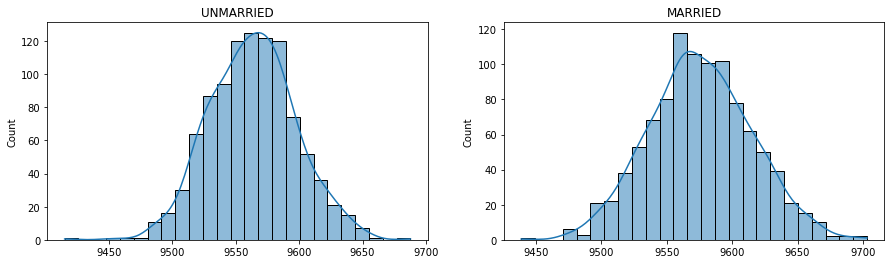

In [78]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("UNMARRIED")
sns.histplot(unmarried_spends, bins=25, kde=True)
plt.subplot(1,2,2)
plt.title("MARRIED")
sns.histplot(married_spends, bins=25, kde=True)

In [79]:
se_unmarried = np.std(unmarried_spends); se_unmarried

33.858307494273376

In [80]:
se_married = np.std(married_spends); se_married

38.93968968962186

In [81]:
unmarried_L_limit = np.mean(unmarried_spends)-norm.ppf(0.975)*se_unmarried
unmarried_U_limit = np.mean(unmarried_spends)+norm.ppf(0.975)*se_unmarried
((unmarried_L_limit, unmarried_U_limit),np.mean(unmarried_spends))
print("95% confidence interval for unmarried: ",((unmarried_L_limit, unmarried_U_limit),np.mean(unmarried_spends)))

95% confidence interval for unmarried:  ((9497.076890398375, 9629.799016930892), 9563.437953664634)


In [82]:
married_L_limit = np.mean(married_spends)-norm.ppf(0.975)*se_married
married_U_limit = np.mean(married_spends)+norm.ppf(0.975)*se_married
((married_L_limit, married_U_limit),np.mean(married_spends))
print("95% confidence interval for married: ",((married_L_limit, married_U_limit),np.mean(married_spends)))

95% confidence interval for married:  ((9499.240040657982, 9651.88081937963), 9575.560430018806)


- <mark>Married and Unmarried purchase confidence interval is overlapping</mark>
- <mark>Married and Unmarried have same/similar spending range </mark>

# Analysis Results
 - <strong>Q1. Are women spending more money per transaction than men? Why or Why not?</strong>
  - <mark>No women are not spending more money per transaction than men. Infact men are spending more money per transaction than women</mark>
 - <strong>Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers</strong>
  - <mark>95% confidence interval of male mean purchase: (9749.0971583368, 9864.842970032523)</mark>
  - <mark>95% confidence interval of female mean purchase: (8885.884799650306, 9049.20297409343)</mark>
 - <strong>Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?</strong>
  - <mark>No, confidence interval of male and female mean purchase is not overlapping</mark>
  - <mark>Male are spending more money per transaction than female</mark>
 - <strong>Q4. Analysis on Married vs Unmarried</strong>
  - <mark>95% confidence interval for unmarried:  (9497.076890398375, 9629.799016930892)</mark>
  - <mark>95% confidence interval for married:    (9499.240040657982, 9651.88081937963)</mark>
  - <mark>Married and Unmarried have same/similar spending range </mark>